# Анализ и построение модели по данным о ценах на дома

## Импорт пакетов
- `matplotlib.pyplot`, `pylab`, `seaborn` - рисование графиков
- `pandas` - работа с таблицами
- `numpy` - работа с матрицами
- `linear_model` - модель линейной регрессии

In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

import pandas as pd

import numpy as np

# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

import xgboost as xg 

%matplotlib inline

## Анализ данных

`kc_house_data.csv`

[Dataset source](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

### Загрузка данных

In [2]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/kc_house_data.csv")
df = pd.read_csv(data_csv)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Простая линейная регрессия

In [3]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split
Y = df['price'].copy()
X = df[['bathrooms']].copy()
# X = df.drop(['id','date', 'price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [4]:
# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# обучить модель
simple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ', simple_regr.intercept_)

Coefficients:  [246883.4293257]
Intercept:  16068.776681512303


Text(0, 0.5, 'price')

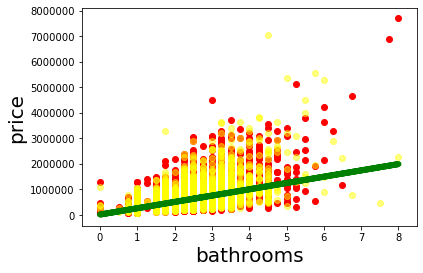

In [5]:
plt.scatter(X_train, y_train,  color='red')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

plt.plot(X_train, simple_regr.coef_[0]*X_train + simple_regr.intercept_, '-g', linewidth=6)
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)

In [6]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(X_test)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.26668331592853456
MSE: 109800514141.87013
MAE: 331361.60631833936


## Полиномиальная регрессия (квадратичная) 2D

Coefficients:  [      0.         -200582.6213426    97645.53838961]
Intercept:  468297.37656960275
R2: 0.30494065025874306
MSE: 104072190935.26907
MAE: 322602.21780897456


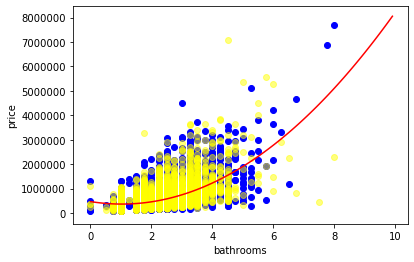

In [7]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

# The coefficients
print('Coefficients: ', poly_regr.coef_)
print('Intercept: ', poly_regr.intercept_)

plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = poly_regr.intercept_+ poly_regr.coef_[1]*XX+ poly_regr.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("bathrooms")
plt.ylabel("price")

X_test_poly = poly.fit_transform(X_test)
y_predicted = poly_regr.predict(X_test_poly)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

## Полиномиальная регрессия (кубическая) 2D

Coefficients:  [    0.         42952.31759297  -270.58269749 11377.63552076]
Intercept:  296303.8030869135
R2: 0.30494065025874306
MSE: 104072190935.26907
MAE: 322602.21780897456


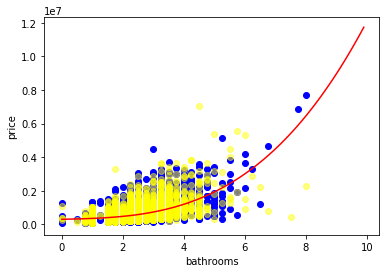

In [8]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
cubic_regr = linear_model.LinearRegression()
y3_train = cubic_regr.fit(X_train_poly3, y_train)

# The coefficients
print ('Coefficients: ', cubic_regr.coef_)
print ('Intercept: ',cubic_regr.intercept_)

plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = cubic_regr.intercept_+ cubic_regr.coef_[1]*XX + cubic_regr.coef_[2]*np.power(XX, 2) + cubic_regr.coef_[3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("bathrooms")
plt.ylabel("price")

test_x_poly3 = poly3.fit_transform(X_test)
y3_predicted = cubic_regr.predict(test_x_poly3)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

## Множественная линейная регрессия (2D)

In [9]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split
Y = df['price'].copy()
X = df[['bathrooms','sqft_living15']].copy()
# X = df.drop(['id','date', 'price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

Coefficients:  [137572.73251559    217.98271796]
Intercept:  -185302.3438672294


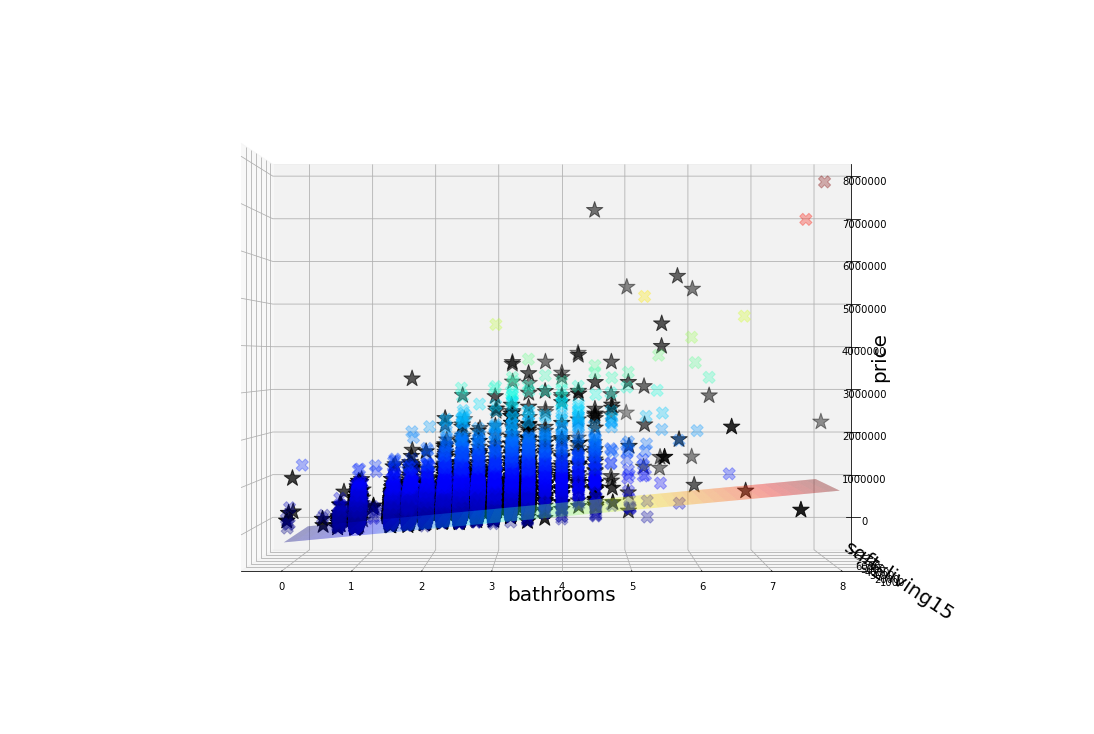

In [11]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
# Creating figure

fig = plt.figure(figsize = (15, 10))

ax = Axes3D(fig, azim=-90, elev=0)

ax.scatter3D(X_test.bathrooms, 
             X_test.sqft_living15, 
             y_test, 
             marker='*', 
             color='black',
             s=300,
             facecolor='black')

ax.scatter3D(X_train.bathrooms, 
             X_train.sqft_living15, 
             y_train, 
             c = y_train, 
             marker='X', 
             cmap='jet',    # https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
             s=150,
             alpha=0.3,
             facecolor='black')
ax.set_xlabel('bathrooms', fontsize=20)
ax.set_ylabel('sqft_living15', fontsize=20)
ax.set_zlabel('price', fontsize=20)

xspan = np.linspace(X_train.bathrooms.min(), X_train.bathrooms.max())
yspan = np.linspace(X_train.sqft_living15.min(), X_train.sqft_living15.max())
xspan, yspan = np.meshgrid(xspan, yspan)

Z = multiple_regr.intercept_ + multiple_regr.coef_[0] * xspan
+ multiple_regr.coef_[1] * yspan

surf = ax.plot_surface(xspan, yspan, Z, cmap='jet', alpha=0.4, linewidth=0)

In [12]:
# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(X_test)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.3926722388919476
MSE: 90936019690.77286
MAE: 301555.9976037168


## Множественная линейная регрессия (N-D)

In [13]:
# выбрать даннные для обучения / предсказания
columns = ['bathrooms', 'grade', 'condition', 'yr_built', 'sqft_living15']

Y = df['price'].copy()
X = df[['bathrooms', 'grade', 'condition', 'yr_built', 'sqft_living15']].copy()
#X = df.drop(['CO2EMISSIONS', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(X_test)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [ 1.20556172e+05  1.63952411e+05  1.57464900e+04 -4.43578683e+03
  9.35879178e+01]
Intercept:  7532247.26180017
R2: 0.5685313831173343
MSE: 64604388525.246346
MAE: 254173.9336069817


## Полиномиальная регрессия (квадратичная) N-D

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

# The coefficients
print('Coefficients: ', poly_regr.coef_)
print('Intercept: ', poly_regr.intercept_)

X_test_poly = poly.fit_transform(X_test)
y_predicted = poly_regr.predict(X_test_poly)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [ 0.00000000e+00 -2.93086887e+05  1.31420448e+06  5.17115243e+05
 -9.30361941e+04  4.39921268e+03  3.20743915e+04  4.76002244e+04
 -1.69411890e+03 -6.43937844e+01  2.66354957e+00  2.12245420e+04
 -5.07766391e+03 -7.71509014e+02 -3.35432214e+01  2.96811184e+03
 -2.95275123e+02  5.79688267e+01  2.56915566e+01 -2.23920092e+00
  4.31201539e-02]
Intercept:  84637478.0603945
R2: 0.6490078977112419
MSE: 52554529479.77069
MAE: 229247.74694589846


## Полиномиальная регрессия (4-я степень) N-D

In [16]:
poly3 = PolynomialFeatures(degree=4)
X_train_poly3 = poly3.fit_transform(X_train)
cubic_regr = linear_model.LinearRegression()
cubic_regr.fit(X_train_poly3, y_train)

# The coefficients
print ('Coefficients: ', cubic_regr.coef_)
print ('Intercept: ',cubic_regr.intercept_)

test_x_poly = poly3.fit_transform(X_test)
y_predicted = cubic_regr.predict(test_x_poly)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [-1.86046843e-01  6.89978681e+03 -1.64389696e+03  1.11787143e+03
  5.45937311e+02 -5.00942576e+03  1.23325662e+01  2.83190059e+02
 -1.08575178e+02 -9.84084756e+04  8.29882696e+04  5.10047173e+01
  1.68720795e+02 -7.94875613e+04  1.28807226e+05  5.82418975e+02
  1.21455180e+05 -1.36093824e+05  3.75689964e+03 -5.50443872e+01
 -1.68476846e+02  2.50428275e+03 -8.28255880e+03 -7.67320119e+02
 -6.75015095e+02  5.70887132e+02 -4.99311261e+04  8.35304655e+03
 -7.49634614e+02  2.38201311e+02 -1.33882158e+02 -1.77905031e+03
  1.62667677e+03  1.08391610e+02 -8.97380686e+01  3.57973912e-01
 -9.79930306e+04 -1.57108706e+04  1.60315827e+03 -5.62696380e+02
 -3.64985996e+03  2.78312308e+03 -3.14295604e+03  6.91666689e+01
 -1.20935219e+02  2.37043319e-01  7.54176690e+02 -1.76792551e+03
  1.83841431e+03 -1.23957770e+02  1.38179893e+02  2.37783552e+00
 -2.57856433e+00  4.56217497e-02  1.67319357e-01 -2.90822471e-04
  2.51371183e+03 -1.20577944e+04  1.10700485e+04 -1.95030302e+01
  3.113647

## XGBoost for Regression

In [17]:
# разделить независимую и зависимую переменные / train и test
Y = df['price'].copy()
X = df.drop(['id','date', 'price'],axis=1)   # использовать все остальные колонки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [29]:
xgb_r = xg.XGBRegressor(n_estimators=800, 
                        learning_rate=0.05, 
                        max_depth=5) 

# Fitting the model 
xgb_r.fit(X_train, y_train) 

# Predict the model 
y_predicted = xgb_r.predict(X_test) 

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.8842485394214923
MSE: 17331625149.48855
MAE: 131649.63026719273
